<a href="https://colab.research.google.com/github/npasuparthi/nagendra-AI_ML/blob/master/Copy_of_R8_Statistical_NLP_Question_Nagendra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Mobile Phone Review Analysis

## Context

The product companies can utilize the detailed review comments to gather insights from the end user. Most of the products are sold via e-commerce sites like Flipkart or Amazon where customers can buy a product and give their review about the product on the web site. 
Product managers can identify the relevant reviews from the website and run a sentiment analysis tool to understand what the sentiments of the customer are. Based on their sentiments, they can identify what users think of the current product. Are they happy? Discontent? 
They can also come up with a document that lists the features, the team needs to focus on for making the product better. 

## Objective

Given the review data rating label, we will try to get insights about various brands and their ratings using text analytics and build a model to predict the rating and overall sentiment. 


### Package version

- tensorflow==2.3.0
- scikit-learn==0.22.2.post1
- pandas==1.0.5
- numpy==1.18.5
- matplotlib==3.2.2
- google==2.0.3

### Data Dictionary 

product_data.csv - contains product details
- 'asin',  - Product ASIN
- 'brand', - Product Brand
- 'title', - Product Title
- 'url',  - Product URL
- 'image', - Product Image URL
- 'rating',- Product Avg. Rating
- 'reviewUrl' - Product Review Page URL
- 'totalReviews' - Product Total Reviews
- ‘price’ - Product Price ($)
- ‘originalPrice’ - Product Original Price ($)
 
reviews.csv  - contains user review details
 
- 'asin' - Product ASIN
- 'name' - Reviewer Name
- 'rating' - Reviewer Rating (scale 1 to 5)
- 'date'  - Review Date
- 'verified' - Valid Customer
- 'title'  - Review Title
- 'body'  - Review Content
- 'helpfulVotes  - Helpful Feedbacks


## Table of Content

1. Import Libraries

2. Setting options

3. Read Data

4. Data Analysis and EDA

5. Text preprocessing and Vectorization

6. Model building

7. Conclusion and Interpretation

## 1. Import Libraries

Let us start by mounting the drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Let us check for the version of installed tensorflow.

In [3]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)

2.5.0


## 2. Setting Options

In [5]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

## 3. Read Data

### 3.1 Read the provided CSVs and check 5 random samples and shape to understand the datasets

In [6]:
os.chdir('/content/drive/MyDrive/GL_Lab/NLP_lab')

In [7]:
products_df = pd.read_csv('product_data.csv')
reviews_df = pd.read_csv('reviews.csv')

In [8]:
print(products_df.sample(5))

           asin    brand                                              title  \
203  B06X9HVVC5     Sony  Sony Xperia XA1 G3123 32GB Unlocked GSM LTE Oc...   
234  B06Y29N548  Samsung  Samsung Galaxy S7 Edge G935A 32GB Unlocked GSM...   
356  B079J5MKXJ   Google  Google Pixel 2 XL 128GB Unlocked GSM/CDMA 4G L...   
159  B01I8V0MJQ  Samsung    Samsung Galaxy S7 32GB T-Mobile - Gold Platinum   
214  B06XS2GWFC  Samsung  Samsung Galaxy J7 - Verizon Carrier Locked No ...   

                                                   url  \
203  https://www.amazon.com/Sony-Xperia-XA1-Unlocke...   
234  https://www.amazon.com/Samsung-Galaxy-Unlocked...   
356  https://www.amazon.com/Google-Pixel-XL-Unlocke...   
159  https://www.amazon.com/Samsung-Galaxy-S7-32GB-...   
214  https://www.amazon.com/Samsung-Galaxy-J7-Contr...   

                                                 image    rating  \
203  https://m.media-amazon.com/images/I/71wchmqQn+... 3.0000000   
234  https://m.media-amazon.com/images/I

In [9]:
print(reviews_df.sample(5))

             asin               name  rating              date  verified  \
50335  B07FZH9BGV         Blaquesoul       5    April 22, 2019      True   
746    B003FCO9XE  Jeffrey M. Craver       5  January 11, 2013      True   
35965  B071W9WQ8M            Octavia       1    March 17, 2018      True   
31231  B06XR8G1TX    marc archambeau       1  January 13, 2019      True   
45505  B079HG7TZS              Randy       5   August 20, 2018      True   

                                        title  \
50335                     DOPEST PHONE EVER!!   
746         For the price, it's a great phone   
35965                                DONT BUY   
31231  Refurbished shouldn't mean really used   
45505                            Works great.   

                                                    body  helpfulVotes  
50335  Man....I had my eye on this for a while and I ...           nan  
746    It's got a camera, it's easy to figure out, it...     1.0000000  
35965    The phone acts up an

## 4.  Data Analysis and EDA

### 4.1 Drop unnecessary columns like 'url', 'image' from the product_data

In [10]:
products_df.columns

Index(['asin', 'brand', 'title', 'url', 'image', 'rating', 'reviewUrl',
       'totalReviews', 'price', 'originalPrice'],
      dtype='object')

In [11]:
reviews_df.columns

Index(['asin', 'name', 'rating', 'date', 'verified', 'title', 'body',
       'helpfulVotes'],
      dtype='object')

In [12]:
products_df.shape

(720, 10)

In [14]:
reviews_df.shape

(67986, 8)

In [17]:
products_df.drop(['url', 'image', 'reviewUrl'], axis=1, inplace=True)

### 4.2 Check statistical summary of both datasets. Note:- Include both numerical and object type columns.

In [20]:
products_df.describe(include='all')

,asin,brand,title,rating,totalReviews,price,originalPrice
count,720,716,720,720.0000000,720.0000000,720.0000000,720.0000000
unique,720,10,718,nan,nan,nan,nan
top,B07N7SC1HK,Samsung,"Apple iPhone 6S, 64GB, Rose Gold - For AT&T / ...",nan,nan,nan,nan
freq,1,346,2,nan,nan,nan,nan
mean,NaN,NaN,NaN,3.7137500,105.6791667,234.9489306,63.6907778
std,NaN,NaN,NaN,0.7160138,167.6011014,200.0084407,172.4053696
min,NaN,NaN,NaN,1.0000000,1.0000000,0.0000000,0.0000000
25%,NaN,NaN,NaN,3.3000000,7.0000000,97.5125000,0.0000000
50%,NaN,NaN,NaN,3.8000000,32.0000000,188.9750000,0.0000000
75%,NaN,NaN,NaN,4.1000000,122.2500000,336.7250000,0.0000000


In [21]:
reviews_df.describe(include='all')

,asin,name,rating,date,verified,title,body,helpfulVotes
count,67986,67984,67986.0000000,67986,67986,67972,67965,27215.0000000
unique,720,47323,nan,2983,2,41489,59811,nan
top,B00F2SKPIM,Amazon Customer,nan,"December 11, 2019",True,Five Stars,Good,nan
freq,981,6507,nan,234,61225,6043,303,nan
mean,NaN,NaN,3.8079163,NaN,NaN,NaN,NaN,8.2296895
std,NaN,NaN,1.5829058,NaN,NaN,NaN,NaN,31.9548772
min,NaN,NaN,1.0000000,NaN,NaN,NaN,NaN,1.0000000
25%,NaN,NaN,3.0000000,NaN,NaN,NaN,NaN,1.0000000
50%,NaN,NaN,5.0000000,NaN,NaN,NaN,NaN,2.0000000
75%,NaN,NaN,5.0000000,NaN,NaN,NaN,NaN,5.0000000


### 4.3 From the above statistical summary, write inferences like count of unique products, top brand, top title, range of rating, price range, etc

In [25]:
# count of unique products is 720 
# there are 10 unique brands
# range of rating is 1-5
# price range is 0.0000000 - 999.9900000
# top title is "Apple iPhone 6S, 64GB, Rose Gold - For AT&T / ...	"

#Samsung is the top brand, here are the products associcated with Samsung brand
products_df[products_df['brand'] == 'Samsung']

,asin,brand,title,rating,totalReviews,price,originalPrice
6,B0029F2O3A,Samsung,"Samsung Alias2 U750 Phone, Black (Verizon Wire...",3.0000000,29,0.0000000,0.0000000
7,B002AS9WEA,Samsung,Samsung a167 Prepaid GoPhone (AT&T),2.9000000,18,0.0000000,0.0000000
10,B0033SFV5A,Samsung,Verizon or PagePlus Samsung Smooth U350 Great ...,3.3000000,57,64.9900000,0.0000000
11,B003FCO9XE,Samsung,Samsung Smooth Verizon Wireless Prepaid Mobile...,2.6000000,78,99.9900000,0.0000000
12,B003P2VNAQ,Samsung,"Samsung Rugby II, Black (AT&T)",3.6000000,70,179.0000000,0.0000000
14,B003XREZ4O,Samsung,"Samsung Gusto, Black (Verizon Wireless)",3.4000000,16,99.9900000,0.0000000
15,B0046REOWS,Samsung,Samsung T201G Prepaid Phone (Net10),3.6000000,22,64.9400000,0.0000000
16,B004C7NVD0,Samsung,Samsung Convoy SCH-U640 Cell Phone Ruggedized ...,3.2000000,107,199.9900000,0.0000000
17,B004GLQTG8,Samsung,Samsung R355C Net 10 Unlimited,3.5000000,146,79.9900000,0.0000000
18,B004H23JXW,Samsung,Samsung Focus I917 Unlocked Phone with Windows...,3.4000000,349,0.0000000,0.0000000


### 4.4 Analyze the distribution of ratings and other categorical features like brand, etc

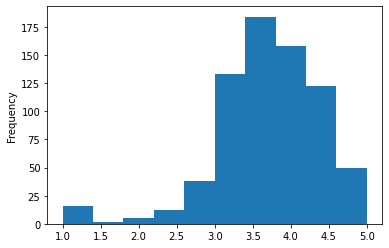

In [30]:
products_df['rating'].plot.hist()

In [28]:
import seaborn as sns

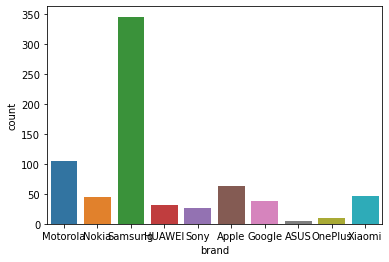

In [31]:
sns.countplot(x="brand", data=products_df)


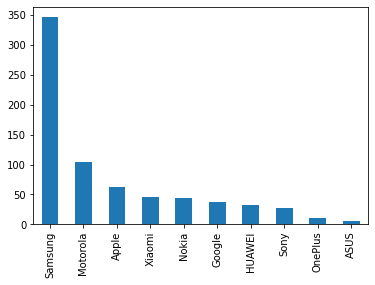

In [33]:
products_df['brand'].value_counts().plot(kind='bar')

### 4.5 Display average rating per brand

In [35]:
products_df.groupby('brand')['rating'].mean().sort_values(ascending=False)

brand
Xiaomi     4.4152174
HUAWEI     4.0218750
ASUS       3.8600000
Sony       3.7888889
Apple      3.7825397
Google     3.7710526
Motorola   3.6438095
Samsung    3.6326590
OnePlus    3.5800000
Nokia      3.3863636
Name: rating, dtype: float64

### 4.6 Display average price per brand

In [36]:
products_df.groupby('brand')['price'].mean().sort_values(ascending=False)

brand
OnePlus    426.1960000
Sony       332.7248148
ASUS       309.6860000
Apple      303.5811111
Samsung    256.5272543
Google     241.8676316
HUAWEI     218.8290625
Xiaomi     214.9676087
Motorola   139.1210476
Nokia      111.4438636
Name: price, dtype: float64

### 4.7 Display average 'totalReviews' per brand

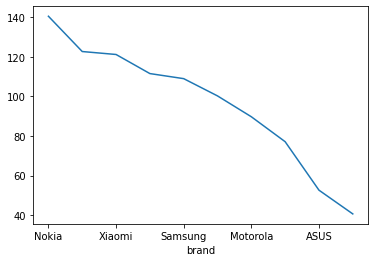

In [38]:
products_df.groupby('brand')['totalReviews'].mean().sort_values(ascending=False).plot()

### 4.8 Merge two datasets using 'asin' and check the shape of the final dataset

In [45]:
merge_df = pd.merge(reviews_df, products_df, how='left', left_on='asin', right_on='asin')

In [46]:
merge_df.columns

Index(['asin', 'name', 'rating_x', 'date', 'verified', 'title_x', 'body',
       'helpfulVotes', 'brand', 'title_y', 'rating_y', 'totalReviews', 'price',
       'originalPrice'],
      dtype='object')

In [47]:
merge_df.shape

(67986, 14)

### 4.9 Rename important features with appropriate names.
Imortant features - "rating_x": "user_rating", "title_x": "review_title", "title_y": "item_title", "rating_y": "overall_rating"

In [51]:
merge_df.rename(columns={"rating_x": "user_rating", "title_x": "review_title", "title_y": "item_title", "rating_y": "overall_rating"}, inplace=True)

merge_df.columns

Index(['asin', 'name', 'user_rating', 'date', 'verified', 'review_title',
       'body', 'helpfulVotes', 'brand', 'item_title', 'overall_rating',
       'totalReviews', 'price', 'originalPrice'],
      dtype='object')

### 4.10 Select rows having verified reviews and check the shape of the final dataset

In [55]:
merge_df['verified'].value_counts()

True     61225
False     6761
Name: verified, dtype: int64

In [58]:
df =  merge_df[merge_df['verified'] == True]
df.shape

(61225, 14)

### 4.11 Check the number of reviews for various brands and report the brand that have highest number of reviews

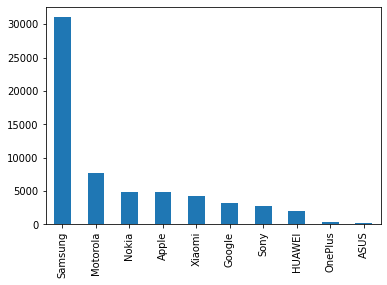

In [61]:
df['brand'].value_counts().plot(kind ='bar')

### 4.12 Drop irrelevant columns and keep important features like 'brand','body','price','user_rating','review_title' for further analysis

In [62]:
df.columns

Index(['asin', 'name', 'user_rating', 'date', 'verified', 'review_title',
       'body', 'helpfulVotes', 'brand', 'item_title', 'overall_rating',
       'totalReviews', 'price', 'originalPrice'],
      dtype='object')

In [130]:
review_cols = ['brand','body','price','user_rating','review_title' ]
df_review = df[review_cols]
df_review.columns

Index(['brand', 'body', 'price', 'user_rating', 'review_title'], dtype='object')

### 4.13 Perform univariate analysis. Check distribution of price, user_rating

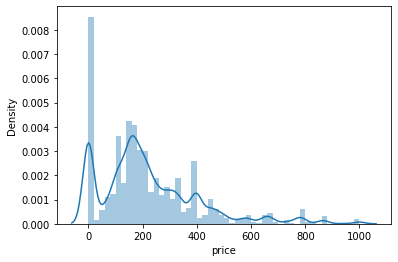

In [131]:
sns.distplot(df_review['price'])

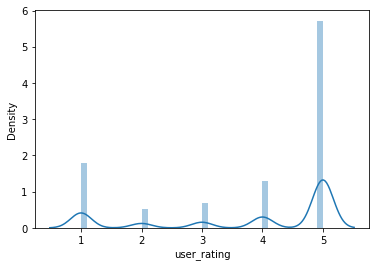

In [132]:
sns.distplot(df_review['user_rating'])

### 4.14 Create a new column called "sentiment". It should have value as 1 (positive) if the user_Rating is greater than 3, value as 0 (neutral) if the user_Rating == 3, and -1 (negative) is the user_Rating is less than 3.

In [133]:
df_review['sentiment'] = df_review['user_rating'].apply(lambda x: 1 if x>3 else (0 if x==3 else -1))

### 4.15 Check frequency distribution of the 'sentiment'

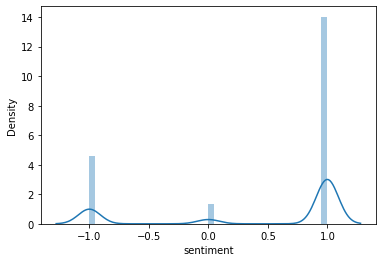

In [134]:
sns.distplot(df_review['sentiment'])

### 4.16 Perform bivariate analysis. Check correlation/crosstab between features and write your inferences.

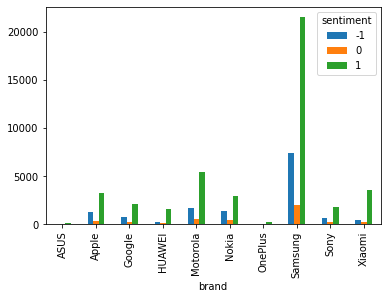

In [135]:
pd.crosstab(df_review['brand'], df_review['sentiment']).plot(kind='bar')

## 5. Text Preprocessing and Vectorization

We will analyze the 'body' and 'review_title' to gain more understanding.

We will ppeform the below tasks

- Convert the text into lowercase
- Remove punctuation
- Remove stopwords (English, from nltk corpus)
- Remove other keywords like "phone" and brand name

### 5.1 Change the datatype of the 'body' column to 'str' and convert it into lowercase. Print any two samples and check the output.

In [136]:
df_review.dtypes

brand            object
body             object
price           float64
user_rating       int64
review_title     object
sentiment         int64
dtype: object

In [137]:
df_review['body'] = df_review['body'].astype('str')
print(df_review.dtypes)

brand            object
body             object
price           float64
user_rating       int64
review_title     object
sentiment         int64
dtype: object


### 5.2 Remove punctuations from the lowercased 'body' column and display at least two samples.

In [138]:
df_review['body'] = df_review['body'].apply(lambda x: x.lower())
df_review.head()


,brand,body,price,user_rating,review_title,sentiment
14,Motorola,don't buy out of service,49.9500000,1,Stupid phone,-1
17,Motorola,1 star because the phones locked so i have to ...,49.9500000,1,Phones locked,-1
18,Motorola,the product has been very good. i had used thi...,49.9500000,5,Excellent product,1
21,Motorola,i bought this phone to replace an lg phone tha...,99.9900000,4,"Nice, but",1
22,Motorola,i purchased this phone for my at&t phone repla...,99.9900000,1,It seems it doesn't work with the existing AT&...,-1


In [139]:
df_review['body'] = df_review['body'].str.replace('[^\w\s]','')


In [140]:
df_review.head()

,brand,body,price,user_rating,review_title,sentiment
14,Motorola,dont buy out of service,49.9500000,1,Stupid phone,-1
17,Motorola,1 star because the phones locked so i have to ...,49.9500000,1,Phones locked,-1
18,Motorola,the product has been very good i had used this...,49.9500000,5,Excellent product,1
21,Motorola,i bought this phone to replace an lg phone tha...,99.9900000,4,"Nice, but",1
22,Motorola,i purchased this phone for my att phone replac...,99.9900000,1,It seems it doesn't work with the existing AT&...,-1


### 5.3 Remove stop words from the above pre-processed 'body' column and display at least two samples.

In [141]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [142]:
stop = stopwords.words('english')

In [143]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [147]:
df_review['keyword'] = df_review['body'].apply(lambda x : " ".join(word for word in x.split() if word not in stop))


In [148]:
df_review.head()

,brand,body,price,user_rating,review_title,sentiment,keyword
14,Motorola,dont buy out of service,49.9500000,1,Stupid phone,-1,dont buy service
17,Motorola,1 star because the phones locked so i have to ...,49.9500000,1,Phones locked,-1,1 star phones locked pay additional fees unlock
18,Motorola,the product has been very good i had used this...,49.9500000,5,Excellent product,1,product good used cell phone one projects work...
21,Motorola,i bought this phone to replace an lg phone tha...,99.9900000,4,"Nice, but",1,bought phone replace lg phone didnt like expec...
22,Motorola,i purchased this phone for my att phone replac...,99.9900000,1,It seems it doesn't work with the existing AT&...,-1,purchased phone att phone replacement even tho...


### 5.4 Apply lemmatisation on the above preprocessed text and display a few samples

In [153]:
nltk.download('wordnet')
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [164]:
def lemmatize_text(text):
  return " ".join([lemmatizer.lemmatize(w) for w in text.split()])


In [165]:
df_review['lemm'] = df_review['keyword'].apply(lemmatize_text)

In [166]:
df_review['lemm'].sample(20)

53121                  nice confortablefunctionality super
8761     battey life pretty good charge every 2 day nic...
3233                                                  love
43532                           love phone definitely must
48404                          love phone really worth try
18607                                     working fine buy
66557    get pay case youll get sluggish phone minimal ...
2530                                                  good
16233    perfect delivery exactly expected pity come po...
3748                              fast delivery advertised
52465                   great phone way cheaper buying new
55325    90th percentile speed android 90 pie finally m...
36493    ordered item arrived time however realized bat...
8590     light sleek bright quick call quality good bet...
48395                                           got wanted
12072    slow time overall great purchase well worth mo...
62182                                    love work perfe

In [167]:
df_review.head(20)

,brand,body,price,user_rating,review_title,sentiment,keyword,lemm
14,Motorola,dont buy out of service,49.9500000,1,Stupid phone,-1,dont buy service,dont buy service
17,Motorola,1 star because the phones locked so i have to ...,49.9500000,1,Phones locked,-1,1 star phones locked pay additional fees unlock,1 star phone locked pay additional fee unlock
18,Motorola,the product has been very good i had used this...,49.9500000,5,Excellent product,1,product good used cell phone one projects work...,product good used cell phone one project worke...
21,Motorola,i bought this phone to replace an lg phone tha...,99.9900000,4,"Nice, but",1,bought phone replace lg phone didnt like expec...,bought phone replace lg phone didnt like expec...
22,Motorola,i purchased this phone for my att phone replac...,99.9900000,1,It seems it doesn't work with the existing AT&...,-1,purchased phone att phone replacement even tho...,purchased phone att phone replacement even tho...
23,Motorola,the phone did not come with a charger and didn...,99.9900000,1,Supply are needed,-1,phone come charger didnt sims card,phone come charger didnt sims card
24,Motorola,served me well as a back up phone,99.9900000,5,Five Stars,1,served well back phone,served well back phone
25,Motorola,i got this phone just as secondary cell phone ...,99.9900000,3,does the job,0,got phone secondary cell phone really lightwei...,got phone secondary cell phone really lightwei...
26,Motorola,sturdy clarity is great easy to use only pro...,99.9900000,4,Awesome with a But!!,1,sturdy clarity great easy use problem speaker ...,sturdy clarity great easy use problem speaker ...
27,Motorola,phone stoped working,99.9900000,1,One Star,-1,phone stoped working,phone stoped working


### 5.5 Write a function to check word frequency of the text

In [171]:
def wordfreq_count(text):
  words = text.split()
  freqdict  = {word: words.count(word) for word in words}
  return freqdict

In [174]:
word_freq.head()

18    {'product': 1, 'good': 1, 'used': 1, 'cell': 1...
21    {'bought': 1, 'phone': 4, 'replace': 1, 'lg': ...
24      {'served': 1, 'well': 1, 'back': 1, 'phone': 1}
26    {'sturdy': 1, 'clarity': 1, 'great': 1, 'easy'...
28    {'beautiful': 1, 'job': 1, 'used': 1, 'item': ...
Name: lemm, dtype: object

### 5.6 Check word frequency of review having top ratings (sentiment = 1) and display output of few samples

In [176]:
word_freq = df_review[df_review['sentiment'] ==1 ]['lemm'].apply(lambda x:wordfreq_count(x))

### 5.7 Initialize tf-idf vectorizer and transform the preprocessed body text

In [182]:
from sklearn.feature_extraction.text import  TfidfVectorizer
# TfidfVectorizer
vect = TfidfVectorizer()
review_vectorizer = vect.fit_transform(df_review['lemm'])

In [183]:
review_vectorizer

<61225x36034 sparse matrix of type '<class 'numpy.float64'>'
	with 1171996 stored elements in Compressed Sparse Row format>

### 5.8 Segregate the data into dependent (sentiment) and independent (transformed body using tf-idf) features for building a classifier. 

In [184]:
X = review_vectorizer
Y = df_review['sentiment']

### 5.9 Split the data into Train & Test Sets

In [188]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=20)


In [189]:
print(X_train.shape, y_train.shape)

(42857, 36034) (42857,)


## 6. Model building

### 6.1 Build a random forest classifier to predict the 'sentiment'
### 6.2 Predict on test set
### 6.3 Check accuracy and confusion matrix

In [190]:
from sklearn.ensemble import RandomForestClassifier
rfc =RandomForestClassifier()
rfc.fit(X_train, y_train)
print("Training Accuracy", rfc.score(X_train, y_train))



Training Accuracy 0.9953333177777259


NameError: ignored

In [191]:
print("Test  Accuracy", rfc.score(X_test, y_test))

Test  Accuracy 0.8547473867595818


In [192]:
predicted = rfc.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))

[[ 3102     9  1177]
 [  360    83   769]
 [  343    10 12515]]
              precision    recall  f1-score   support

          -1       0.82      0.72      0.77      4288
           0       0.81      0.07      0.13      1212
           1       0.87      0.97      0.92     12868

    accuracy                           0.85     18368
   macro avg       0.83      0.59      0.60     18368
weighted avg       0.85      0.85      0.83     18368



## 7. Write your conclusion

In [ ]:
# This lab task gives an overview of data analysis for an NLP application. We have  worked on cleaning the data, stemming , vectorizing and running a simple ML Model.
# recall is low for Neutral class(possibly becuase of low number of data points)
#